In [1]:
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import pandas as pd
import seaborn as sns

In [2]:
sumPath = r'Y:\GECI_screening\wHaloCaMP'
dates = ['20230306_wHaloCaMP_raw','20230313_wHaloCaMP_raw','20230320_wHaloCaMP_raw','20230327_wHaloCaMP_raw',
         '20230403_wHaloCaMP_raw','20230410_wHaloCaMP_raw','20230424_wHaloCaMP_raw','20230501_wHaloCaMP_raw',
        '20230508_wHaloCaMP_raw','20230515_wHaloCaMP_raw','20230522_wHaloCaMP_raw']
df_sc = pd.DataFrame() # combo & single mutants 2023
for date in dates:
    data = glob(os.path.join(sumPath,'combo & single mutants 2023',date)+'\\*.pkl')[0]
    df_temp = pd.read_pickle(data)
    df_sc = pd.concat([df_sc,df_temp],axis=0)
print(df_sc.shape)
data = glob(os.path.join(sumPath,'single mutants only')+'\\*.pkl')[0]
df_so = pd.read_pickle(data) # single mutants only 2022
df_so.shape

(23572, 20)


(72596, 20)

In [4]:
# df_sc.columns == df_so.columns
# df_sc.columns
# df_so.columns

df = pd.concat([df_so,df_sc],axis=0,ignore_index=True)
print(df.shape)
df = df[(df['Curated']=='False')&(df['Filter']=='EX 660/13, DM 677, EM 719/60')]
df.shape

(96168, 20)


(84292, 20)

In [5]:
df_csv = pd.read_csv(r'Z:\GECIScreenData\GECI_Imaging_Data\wHaloCaMP\summary\wHaloCaMP_norm.csv')
df_csv.shape

(19056, 34)

In [6]:
imgPath = r'Z:\GECIScreenData\GECI_Imaging_Data\wHaloCaMP'

In [7]:
Stim = ['001FP','003FP','010FP','160FP']
for stim in Stim:
    df_sel = df_csv[df_csv['Stim']==stim]
    df_sel = df_sel.dropna()
    print(df_sel.shape)
    df_sel.index = np.arange(len(df_sel))

    file1 = open(r'C:\Users\zhengj10\Desktop\summary-%s.json' %stim, 'w')
    s1 = 'construct_json_data=['
    file1.write(s1)

    for i,r in df_sel.iterrows():

        file1.write('["%s",' %r['Construct'])
        file1.write('"%s/%s/' %(r['Date'],r['Plate']))

        df_w = df[(df['Construct']==r['Construct'])&(df['Curated']=='False')&(df['Stim']==stim)&(df['Plate']==r['Plate'])]
        df_w = df_w.dropna()
        platePath = os.path.join(imgPath,r['Date'],r['Plate'])

        for n in range(df_w.Well.unique().shape[0]):
            wells = glob(os.path.join(platePath) + '\\imaging\\*' + df_w.Well.unique()[n])
            file1.write(os.path.basename(wells[0]))
            if n != df_w.Well.unique().shape[0]-1:
                file1.write(',')


        file1.write('",')

        file1.write('[%s,' %r['Unnorm ΔF/F0'])
        file1.write('[%s,%s],' %(r['P val (Norm ΔF/F0)'],0.5))
        file1.write('%s],' %r['Norm ΔF/F0'])

        file1.write('[%s,' %r['Unnorm F0'])
        file1.write('[%s,%s],' %(r['P val (Norm F0)'],0.5))
        file1.write('%s],' %r['Norm F0'])

        file1.write('[%s,' %r['Unnorm half rise time'])
        file1.write('[%s,%s],' %(r['P val (Norm half rise time)'],0.5))
        file1.write('%s],' %r['Norm half rise time'])

        file1.write('[%s,' %r['Unnorm half decay time'])
        file1.write('[%s,%s],' %(r['P val (Norm half decay time)'],0.5))
        file1.write('%s],' %r['Norm half decay time'])

        file1.write('%s,' %r['Ctr ΔF/F0'])
        file1.write('%s,' %r['Ctr F0'])
        file1.write('%s,' %r['Ctr half rise time'])
        if i == len(df_sel)-1:
    #     if i == 1:
            file1.write('%s]' %r['Ctr half decay time'])
        else:
            file1.write('%s],' %r['Ctr half decay time'])
    file1.write(']')
    file1.close()
    print('%s done' %stim)

(4752, 34)
001FP done
(4765, 34)
003FP done
(4771, 34)
010FP done
(4768, 34)
160FP done


#### Top hits

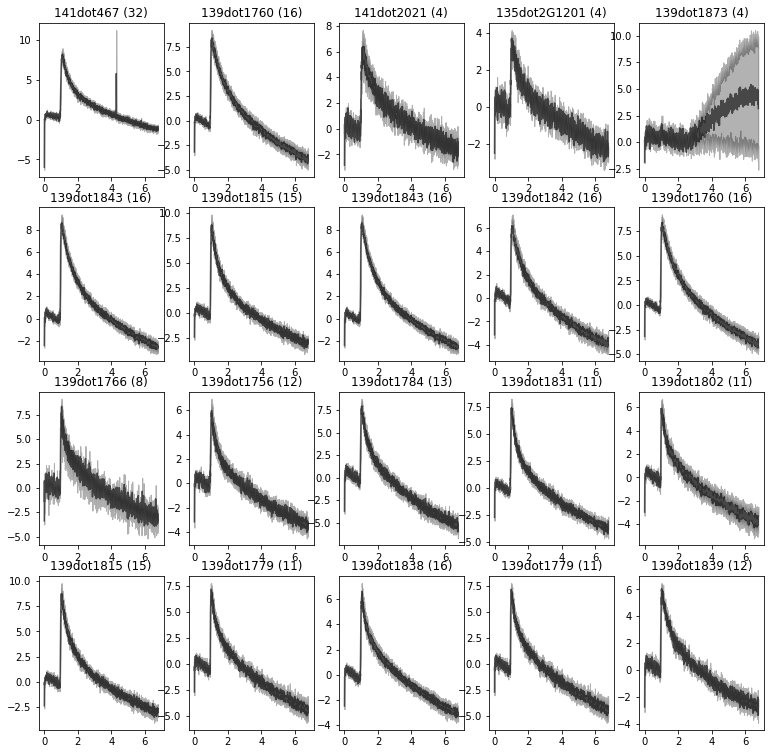

In [8]:
stim = '001FP'
df_csv_s = df_csv[df_csv['Stim']==stim]
df_csv_s = df_csv_s.sort_values(by='Norm ΔF/F0',ascending=False)
df_csv_s.index = np.arange(len(df_csv_s))
bad = []

plt.figure(figsize=[13,13])
n=1
for i,r in df_csv_s.iterrows():
    
#     if r['Construct'] in curated:
#         continue
    
    df_plot = df[(df['Filter']=='EX 660/13, DM 677, EM 719/60')&(df['Stim']==stim)&(df.Curated=='False')&(df['Construct']==r['Construct'])]
    df_plot = df_plot.dropna()

    mean = np.mean(df_plot.DFF.to_list(),axis=0)*100
    std = np.std(mean[50:100])
    
    if std>0.5:

        bad.append(r['Construct'])

#         ax.plot(x,mean,color='r',alpha=0.6)
#         err = np.std(df_plot.DFF.to_list(),axis=0)*100/np.sqrt(len(df_plot))
#         ax.fill_between(x,mean+err,mean-err,color = 'r',alpha=0.3)
#         ax.set_title(r['Construct'] + ' (%s)' %len(df_plot))
        continue
    x = np.arange(mean.shape[0])/206.23
    ax = plt.subplot(4,5,n)
    ax.plot(x,mean,color='k',alpha=0.6)
    err = np.std(df_plot.DFF.to_list(),axis=0)*100/np.sqrt(len(df_plot))
    ax.fill_between(x,mean+err,mean-err,color = 'k',alpha=0.3)
    ax.set_title(r['Construct'] + ' (%s)' %len(df_plot))
    n+=1
    
#     ax.set_title(std)
#         top_hits_001FP.append(r['Construct'])
#         top_hits_003FP.append(r['Construct'])
#         top_hits_010FP.append(r['Construct'])
#         top_hits_160FP.append(r['Construct'])
    
    if n>20:
        break

#     if r['Construct'] in curated:
#         print('month')


In [9]:
# len(bad)
# df_csv_s.loc[:,'Unnorm ΔF/F0']
# df_csv_s
# df_csv_s.Construct.unique().shape

In [10]:
# df_csv_s.shape

In [11]:
# bad

- Filter out artifact based on noise level

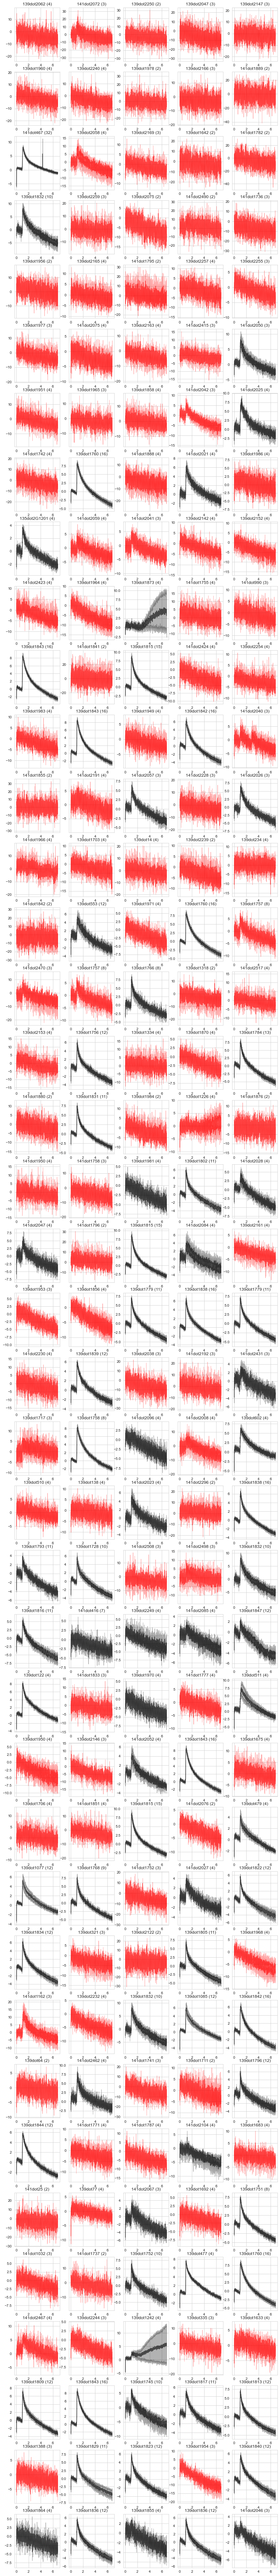

In [12]:
sns.set_style("whitegrid")
stim = '001FP'
# df_csv_s = df_csv[(df_csv['Stim']==stim)&(df_csv['Construct'].str.contains('139dot'))]
# df_csv_s = df_csv[(df_csv['Stim']==stim)&(df_csv['Construct'].str.contains('141dot'))]
df_csv_s = df_csv[df_csv['Stim']==stim]
df_csv_s = df_csv_s.sort_values(by='Norm ΔF/F0',ascending=False)
df_csv_s.index = np.arange(len(df_csv_s))
plt.figure(figsize=[13,130])
x = np.arange(1,1401)/206.23
# x = np.arange(1,1401)
sp = 1
# curated = ['139dot1242','139dot499','139dot575','139dot1126','139dot1655','139dot755','141dot1328']

# top_hits_001FP = []
# top_hits_003FP = []
# top_hits_010FP = []
# top_hits_160FP = []

file1 = open(r'C:\Users\zhengj10\Desktop\curated-as-bad.json','w')
s1 = 'bad_construct_json_data=['
file1.write(s1)

for i,r in df_csv_s.iterrows():
        
#     if r['Construct'] in curated:
#         continue
    
    df_plot = df[(df['Filter']=='EX 660/13, DM 677, EM 719/60')&(df['Stim']==stim)&(df.Curated=='False')&(df['Construct']==r['Construct'])]
    df_plot = df_plot.dropna()

    mean = np.mean(df_plot.DFF.to_list(),axis=0)*100
    std = np.std(mean[50:100])
    ax = plt.subplot(40,5,sp)
    if std>1:
        
        file1.write('["%s","%s"],' %(r['Construct'],r['Plate']))
        file1.write('\n')
        
#     if np.max(mean)>40: # 141dot467 has a huge spike
#         print(r['Construct'],r['Plate'])
#         file1.write('["%s","%s"],' %(r['Construct'],r['Plate']))
#         file1.write('\n')
        
        ax.plot(x,mean,color='r',alpha=0.6)
        err = np.std(df_plot.DFF.to_list(),axis=0)*100/np.sqrt(len(df_plot))
        ax.fill_between(x,mean+err,mean-err,color = 'r',alpha=0.3)
        ax.set_title(r['Construct'] + ' (%s)' %len(df_plot))
        sp+=1
        continue
    else:
        ax.plot(x,mean,color='k',alpha=0.6)
        err = np.std(df_plot.DFF.to_list(),axis=0)*100/np.sqrt(len(df_plot))
        ax.fill_between(x,mean+err,mean-err,color = 'k',alpha=0.3)
        ax.set_title(r['Construct'] + ' (%s)' %len(df_plot))
        sp+=1
    
#     ax.set_title(std)
#         top_hits_001FP.append(r['Construct'])
#         top_hits_003FP.append(r['Construct'])
#         top_hits_010FP.append(r['Construct'])
#         top_hits_160FP.append(r['Construct'])
    
#     if r['Construct'] in curated:
#         file1.write('["%s","%s"],' %(r['Construct'],r['Plate']))
#         file1.write('\n')
    
#     if i%200==0:
#         print(i)
    if sp>200:
        break



file1.write(']')
file1.close()

# plt.tight_layout()
# # plt.savefig(r'Z:\Presentations\Jihong\GENIE production\220830\artifact.png',dpi=1200)
# plt.show()

In [ ]:
# df_csv_s.shape
# file1.close()
# df_csv_s

In [ ]:
# df_csv_s.columns
# df_top_139 = pd.DataFrame()
# df_top_139['001FP'] = top_hits_001FP
# df_top_139['003FP'] = top_hits_003FP
# df_top_139['010FP'] = top_hits_010FP
# df_top_139['160FP'] = top_hits_160FP

In [ ]:
# df_top_139

In [ ]:
# df_top_139.to_excel(r'C:\Users\zhengj10\Desktop\top_20_hits_139_variants.xlsx')

#### Count number of plots (constructs)

In [ ]:
# imgPath = r'Z:\GECIScreenData\GECI_Imaging_Data\wHaloCaMP\summary\dFF_traces_fig'
# datePath = [d for d in os.listdir(imgPath) if os.path.isdir(os.path.join(imgPath,d))]

# c = 0
# for d in datePath:
#     platePath = [p for p in os.listdir(os.path.join(imgPath,d)) if os.path.isdir(os.path.join(imgPath,d,p))]
#     for p in platePath:
#         img = glob(os.path.join(imgPath,d,p)+'\\*.png')
#         c+=len(img)
# c